In [3]:
import pandas as pd
from sklearn import linear_model
df = pd.read_csv("loans.csv")
print(df.shape)
df.head(10)


(100, 14)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      100 non-null    int64  
 1   purpose            100 non-null    object 
 2   int.rate           100 non-null    float64
 3   installment        100 non-null    float64
 4   log.annual.inc     100 non-null    float64
 5   dti                100 non-null    float64
 6   fico               100 non-null    int64  
 7   days.with.cr.line  100 non-null    float64
 8   revol.bal          100 non-null    int64  
 9   revol.util         100 non-null    float64
 10  inq.last.6mths     100 non-null    int64  
 11  delinq.2yrs        100 non-null    int64  
 12  pub.rec            100 non-null    int64  
 13  not.fully.paid     100 non-null    int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 11.1+ KB


In [4]:
pre_df = pd.get_dummies(df,columns=['purpose'],drop_first=True)
pre_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split

X=pre_df.drop('not.fully.paid',axis=1)
y=pre_df['not.fully.paid']
X_train, X_test, y_train, y_test= train_test_split(
    X,y, test_size=0.33, random_state=125
)

In [10]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()

model.fit(X_train, y_train);

In [11]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
f1=f1_score(y_pred,y_test,average="weighted")

print("Accuracy: ",accuracy)
print("F1 Score: ",f1)

Accuracy:  0.8484848484848485
F1 Score:  0.9180327868852458


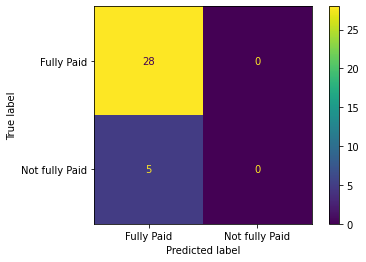

In [12]:
labels=["Fully Paid","Not fully Paid"]
cm = confusion_matrix(y_test,y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();